# House Price Prediction Notebook

Loading Libraries

In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import LabelEncoder

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import metrics

# import the math module  
import math

#Parameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Load Data

In [59]:
data = pd.read_csv("train.csv")
evaluation_data = pd.read_csv("test.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000




Here's a brief description of data features.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale



In [60]:
#Data types info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [61]:
#Data summary
print(data.shape)
data.describe().transpose()

(1460, 81)


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


# Data Processing

Visualize the target variable.
SalePrice is the variable we need to predict. So let's do some analysis on this variable first

In [62]:
#descriptive statistics summary
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Let's Check which features affects our output more using Correlation matrix (heatmap style).

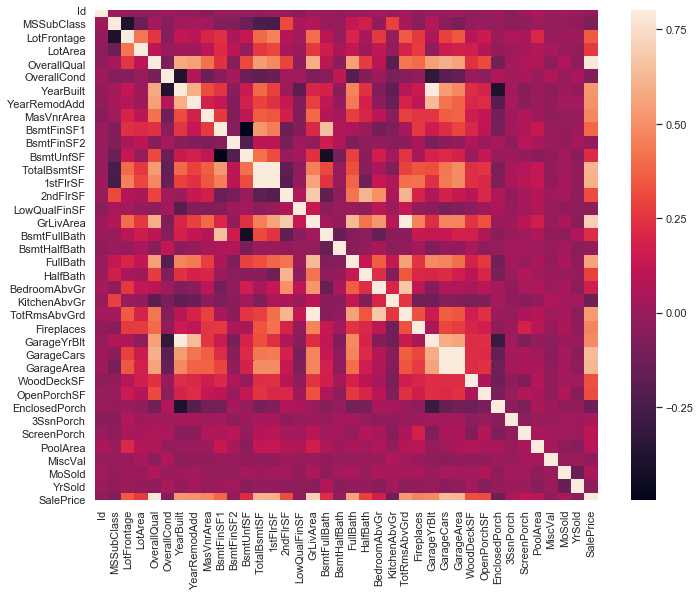

In [63]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

The heatmap above is the best way to get a quick overview of our features and there relationships to the output and 
among themselves.

There are two squares that should get attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. The correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.


Lets now plot top 10 features that most correlated  with output variable

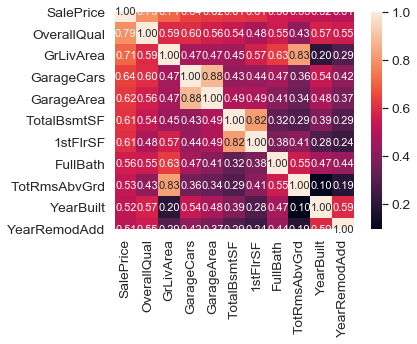

In [64]:
#saleprice correlation matrix
k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 11}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Will go a head and plot scatter plots for the above features 

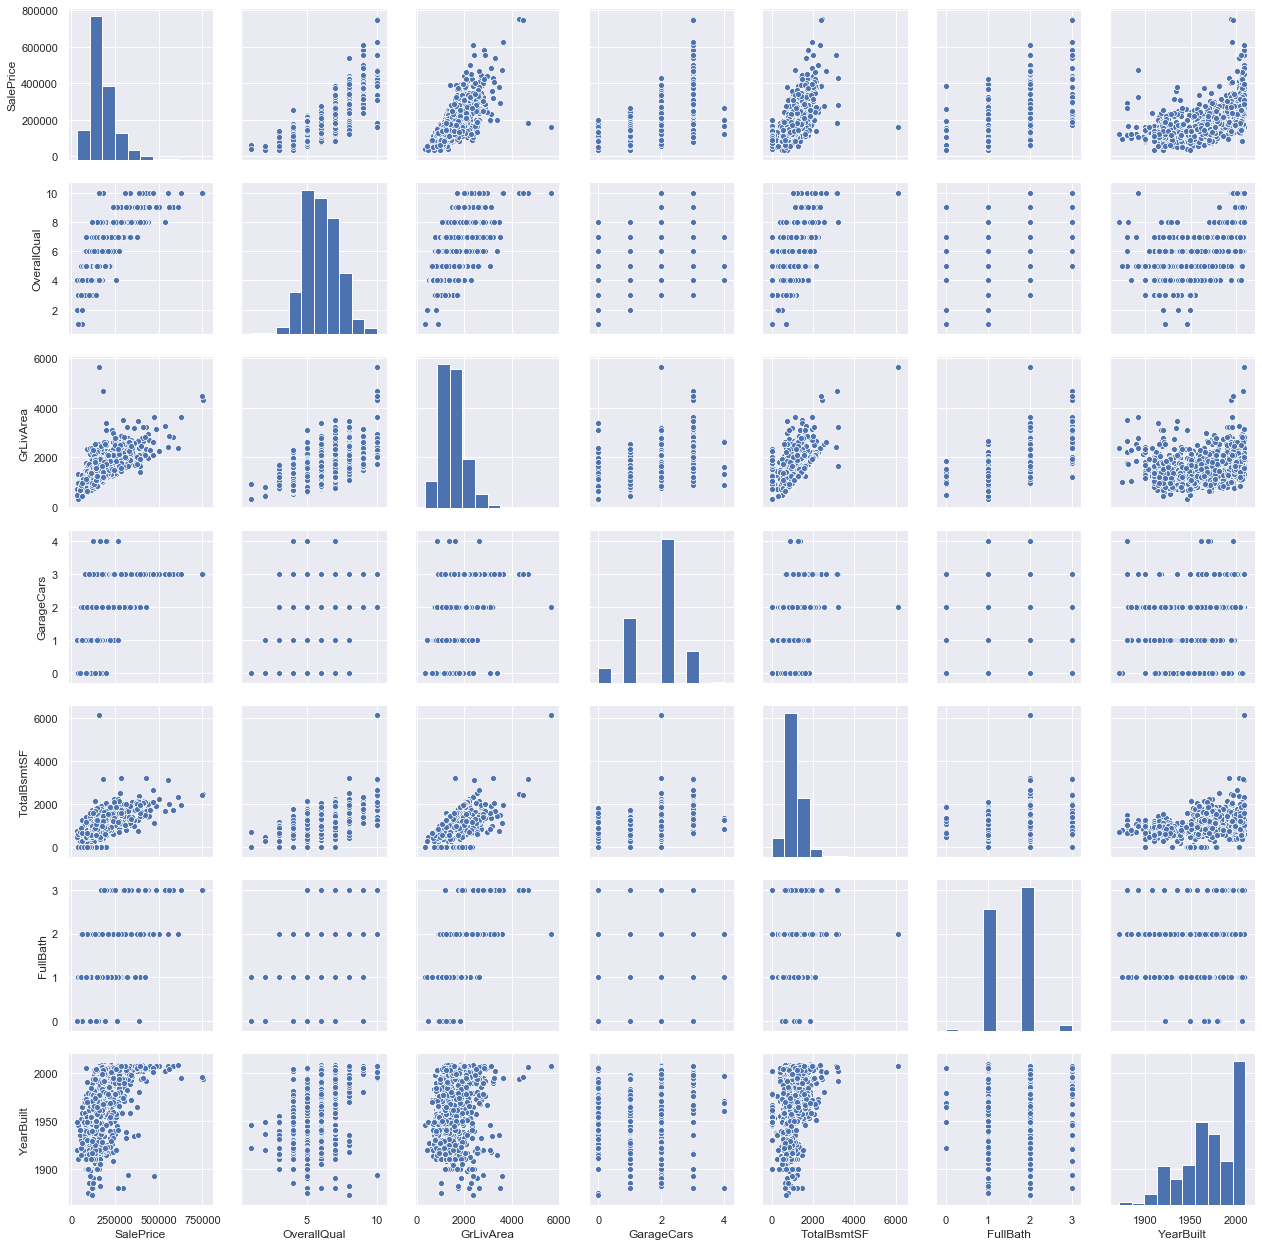

In [65]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], height = 2.5)
plt.show();

# Let's now look at Missing data if any

In [66]:
#Check missing values by percentage
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
    return missing_data.loc[missing_data['Percent'] > 0].head(40)

In [67]:
#missing values
check_missing_data(data)

,Total,Percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Looking at the above results we need to drop features with alot of missing values. We will drop all features that have 10% or more missing values

In [68]:
#Dropping columns with missing value rate higher than threshold
def drop_columns_with_missing_higher_than_threshold(df, threshold):
    '''
    eg threshold = 0.7 to mean 70% missing
    '''
    df = df[df.columns[df.isnull().mean() < threshold]]
    return df

In [69]:
#Return columns with missing value rate higher than threshold
def get_columns_with_missing_higher_than_threshold(df, threshold):
    '''
    eg threshold = 0.7 to mean 70% missing
    '''
    df = df[df.columns[df.isnull().mean() > threshold]]
    return df.columns

Because we would like to drop the same columns from our data we are working on and the evaluation date, so before we drop the colums, let's list them.

In [70]:
get_columns_with_missing_higher_than_threshold(data, 0.1)

Index(['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [71]:
def drop_features(df, features_list):
        """
        Takes a dataframe df and a list of features to drop returns a df without dropped features
        """
        return df.drop(columns=features_list)

In [72]:
#Drop features with more than 10% of observations missing
data = drop_columns_with_missing_higher_than_threshold(data, 0.1)
evaluation_data = drop_features(evaluation_data, ['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature'])

In [73]:
#check missing values again
check_missing_data(data)

,Total,Percent
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945
GarageCond,81,5.547945
GarageQual,81,5.547945
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
BsmtFinType1,37,2.534247
BsmtCond,37,2.534247
BsmtQual,37,2.534247


# Fill the missing data

Looking at the above remaining missing values, we realize that we have some related features missing in exact same
number. For categorical features, we will add an additional category for missing values and for numerical features
we will fill them with zero.

In [74]:
 def fillMissingFeatures(filler, dataFrameList,feature):
        for dataset in dataFrameList:
            if(filler == 'MEAN'):
                #complete missing feature with mean
                dataset[feature].fillna(dataset[feature].mean(), inplace = True)
            elif(filler == 'MEDIAN'):
                #complete missing feature with median
                dataset[feature].fillna(dataset[feature].median(), inplace = True)
            elif(filler == 'MODE'):
                #complete missing feature with mode
                dataset[feature].fillna(dataset[feature].mode()[0], inplace = True)
            elif(filler == 'ZERO'):
                #complete missing feature with zero
                dataset[feature].fillna(0, inplace = True)
            elif(filler == 'MISSING'):
                #complete missing feature with zero
                dataset[feature].fillna('MISSING', inplace = True)

In [75]:
#Check if common features miss together
def check_if_common_features_miss_together(df, feature_list):
    '''
    This helps in deciding how to fill the missing values.

    For example for the following 3 features 'maried', 'year_maried' and 'happy_in_marriage'. 
    If all 3 are missing for an observation, then maybe marriage never happened and so helps in deciding how to fill the missing values
    '''
    all_missing = []
    for index, row in df.iterrows():
        is_missing = False
        for feature in feature_list:
            if(pd.isnull(df.at[index, feature])):
                is_missing = True
            else:
                is_missing = False
        if is_missing == True:
            all_missing.append(index)

    print('Number of missing rows  *****************>'+str(len(all_missing)))
    return all_missing

In [76]:
check_if_common_features_miss_together(data, ['GarageType', 'GarageYrBlt','GarageFinish','GarageQual','GarageCond'])
check_if_common_features_miss_together(data, ['BsmtFinType2', 'BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual'])
check_if_common_features_miss_together(data, ['MasVnrType', 'MasVnrArea'])

Number of missing rows  *****************>81
Number of missing rows  *****************>37
Number of missing rows  *****************>8


[234, 529, 650, 936, 973, 977, 1243, 1278]

In [77]:
#Check And Fill the Categorical data with category for related missing features above

#Garage
print(data['GarageType'].unique().tolist())
print(data['GarageYrBlt'].unique().tolist())
print(data['GarageFinish'].unique().tolist())
print(data['GarageQual'].unique().tolist())
print(data['GarageCond'].unique().tolist())

#Basement
print(data['BsmtFinType2'].unique().tolist())
print(data['BsmtExposure'].unique().tolist())
print(data['BsmtFinType1'].unique().tolist())
print(data['BsmtCond'].unique().tolist())
print(data['BsmtQual'].unique().tolist())

#Masonry veneer
print(data['MasVnrType'].unique().tolist())
print(data['MasVnrArea'].unique().tolist())

#Electrical system
print(data['Electrical'].unique().tolist())

['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types']
[2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993.0, 2004.0, 1973.0, 1931.0, 1939.0, 1965.0, 2005.0, 1962.0, 2006.0, 1960.0, 1991.0, 1970.0, 1967.0, 1958.0, 1930.0, 2002.0, 1968.0, 2007.0, 2008.0, 1957.0, 1920.0, 1966.0, 1959.0, 1995.0, 1954.0, 1953.0, nan, 1983.0, 1977.0, 1997.0, 1985.0, 1963.0, 1981.0, 1964.0, 1999.0, 1935.0, 1990.0, 1945.0, 1987.0, 1989.0, 1915.0, 1956.0, 1948.0, 1974.0, 2009.0, 1950.0, 1961.0, 1921.0, 1900.0, 1979.0, 1951.0, 1969.0, 1936.0, 1975.0, 1971.0, 1923.0, 1984.0, 1926.0, 1955.0, 1986.0, 1988.0, 1916.0, 1932.0, 1972.0, 1918.0, 1980.0, 1924.0, 1996.0, 1940.0, 1949.0, 1994.0, 1910.0, 1978.0, 1982.0, 1992.0, 1925.0, 1941.0, 2010.0, 1927.0, 1947.0, 1937.0, 1942.0, 1938.0, 1952.0, 1928.0, 1922.0, 1934.0, 1906.0, 1914.0, 1946.0, 1908.0, 1929.0, 1933.0]
['RFn', 'Unf', 'Fin', nan]
['TA', 'Fa', 'Gd', nan, 'Ex', 'Po']
['TA', 'Fa', nan, 'Gd', 'Po', 'Ex']
['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ']
['

In [78]:
#Fill the Categorical data with category for related missing features

#Garage
fillMissingFeatures('MISSING', [data, evaluation_data],'GarageType')
fillMissingFeatures('ZERO', [data, evaluation_data],'GarageYrBlt')
fillMissingFeatures('MISSING', [data, evaluation_data],'GarageFinish')
fillMissingFeatures('MISSING', [data, evaluation_data],'GarageQual')
fillMissingFeatures('MISSING', [data, evaluation_data],'GarageCond')

#Basement
fillMissingFeatures('MISSING', [data, evaluation_data],'BsmtFinType2')
fillMissingFeatures('MISSING', [data, evaluation_data],'BsmtExposure')
fillMissingFeatures('MISSING', [data, evaluation_data],'BsmtFinType1')
fillMissingFeatures('MISSING', [data, evaluation_data],'BsmtCond')
fillMissingFeatures('MISSING', [data, evaluation_data],'BsmtQual')

#Masonry veneer
fillMissingFeatures('MISSING', [data, evaluation_data],'MasVnrType')
fillMissingFeatures('ZERO', [data, evaluation_data],'MasVnrArea')

#Electrical system
fillMissingFeatures('MODE', [data, evaluation_data],'Electrical')

In [79]:
check_missing_data(evaluation_data)

,Total,Percent
MSZoning,4,0.27416
BsmtFullBath,2,0.13708
Utilities,2,0.13708
BsmtHalfBath,2,0.13708
Functional,2,0.13708
TotalBsmtSF,1,0.06854
GarageArea,1,0.06854
BsmtFinSF2,1,0.06854
BsmtUnfSF,1,0.06854
SaleType,1,0.06854


Fill the missing features in the evaluation data

In [80]:
#Fill the missing features in the evaluation data
fillMissingFeatures('MODE', [evaluation_data],'MSZoning')
fillMissingFeatures('MODE', [evaluation_data],'Functional')
fillMissingFeatures('MODE', [evaluation_data],'BsmtHalfBath')
fillMissingFeatures('MODE', [evaluation_data],'Utilities')
fillMissingFeatures('MODE', [evaluation_data],'BsmtFullBath')
fillMissingFeatures('ZERO', [evaluation_data],'BsmtFinSF1')
fillMissingFeatures('ZERO', [evaluation_data],'GarageArea')
fillMissingFeatures('MODE', [evaluation_data],'KitchenQual')
fillMissingFeatures('MODE', [evaluation_data],'Exterior2nd')
fillMissingFeatures('MODE', [evaluation_data],'GarageCars')
fillMissingFeatures('MODE', [evaluation_data],'Exterior1st')
fillMissingFeatures('MODE', [evaluation_data],'SaleType')
fillMissingFeatures('ZERO', [evaluation_data],'TotalBsmtSF')
fillMissingFeatures('ZERO', [evaluation_data],'BsmtUnfSF')
fillMissingFeatures('ZERO', [evaluation_data],'BsmtFinSF2')

In [81]:
#Slicing a dataframe
data.loc[:, 'BsmtQual':'FullBath':1].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath
0,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2
1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2
2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2
3,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1
4,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2


Now that we don't have missing values, we are now going to encode all the categorical features

In [82]:
def encode_labels(df, cols = None):
    '''
    Inputs:
        df: a pandas dataframe containing the column for which to calculate target encoding (categ_col)
        cols: all columns' names for which to do label encoding . If is None (default) then all object columns are taken.
    Output: df with cols replaced the coresponding label encodings while maintaining all existing None values at their positions.
    '''

    le = LabelEncoder()
    for col in cols:
        # pick some random value from the col - will make it null back at the end anyway
        null_replacement = df[col].values[0]
        # save col null positions and set ones for the rest
        nan_col = np.array([1 if not pd.isnull(x) else x for x in df[col]])
        # replace nulls in the original array, and fit on it
        a = np.array([x if not pd.isnull(x) else null_replacement for x in df[col]])
        le.fit(a)
        # transform the data and add the nulls back
        df[col] = le.transform(a) * nan_col

    return(df) 

In [83]:
#Convert Categorical features into numerics.
data = encode_labels(data, cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','SaleType','SaleCondition','Condition1','Condition2','BldgType','HouseStyle','GarageFinish','GarageQual','GarageCond','PavedDrive','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','KitchenQual','Functional','GarageType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical'])
evaluation_data = encode_labels(evaluation_data, cols = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','SaleType','SaleCondition','Condition1','Condition2','BldgType','HouseStyle','GarageFinish','GarageQual','GarageCond','PavedDrive','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','KitchenQual','Functional','GarageType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical'])
data.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In the data we have year build and year sold. We can check if the AGE of a house affects its SalesPrice

In [84]:
data[['YearBuilt', 'YrSold']].head()

,YearBuilt,YrSold
0,2003,2008
1,1976,2007
2,2001,2008
3,1915,2006
4,2000,2008


In [85]:
#Create new feature age
data['house_age'] = data['YrSold']-data['YearBuilt']
evaluation_data['house_age'] = evaluation_data['YrSold']-evaluation_data['YearBuilt']

In [86]:
data['house_age'].head()

0     5
1    31
2     7
3    91
4     8
Name: house_age, dtype: int64

In [87]:
#saleprice correlation with house age
np.corrcoef(data['house_age'], data['SalePrice'])

array([[ 1.        , -0.52335042],
       [-0.52335042,  1.        ]])

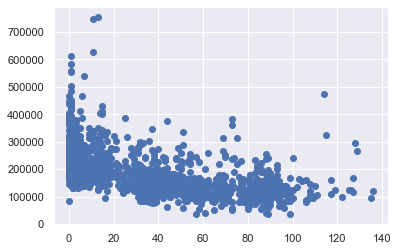

In [88]:
plt.scatter(data['house_age'], data['SalePrice'])
plt.show()

Looking at the correlation above, there is a  relationship with a correlation coefficient of -0.5 that qualifies house age to be one of the predictors of SalePrice

# Target Variable


 mu = 180921.20 and sigma = 79415.29



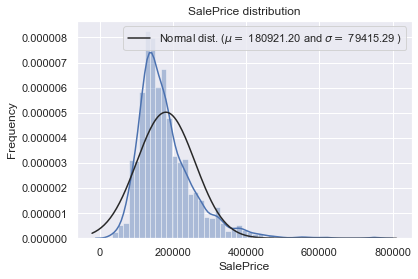

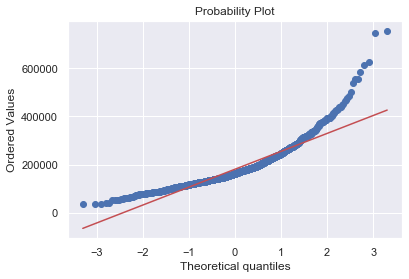

In [89]:
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [90]:
#skewness and kurtosis
print("Skewness: %f" % data['SalePrice'].skew())
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Normalization
The target variable is right skewed. As (linear) models love normally distributed data , 
we need to transform this variable and make it more normally distributed.



Log-transformation of the target variable


 mu = 12.02 and sigma = 0.40



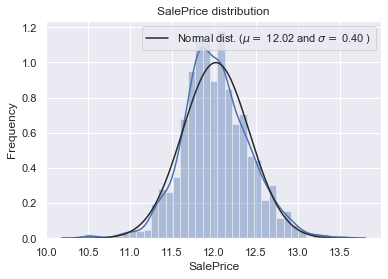

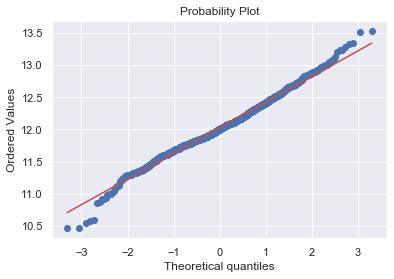

In [91]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["SalePrice"] = np.log1p(data["SalePrice"])

#Check the new distribution 
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

# # ========== Building The Models ===========

In [92]:
#Creating Training and Test Sets

#First Drop Id as it does not affect our output feature
data = drop_features(data, ['Id'])

Y = data["SalePrice"].values
X = data.drop("SalePrice", axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

# KFold Cross-Validation

In [93]:
#KFold algorithm cross validation
def kfold_cross_validation(algorithm_dict, kfold_splits, random_state, scoring, shuffle, X, Y):
    result_dfs = []
    for name, model in algorithm_dict.items():
        kfold = KFold(n_splits=kfold_splits, random_state=random_state, shuffle=shuffle)
        results_kfold = cross_val_score(model, X, Y, scoring=scoring, cv=kfold)
        results_kfold_av_accuracy = results_kfold.mean()
        rmse= np.sqrt(-results_kfold)

        data = {'ALGORITHM':  [name],
                'MSE': [results_kfold_av_accuracy],
               'RMSE': [rmse.mean()],
               'RMSE_STD': [rmse.std()]}
        df = pd.DataFrame (data, columns = ['ALGORITHM', 'MSE', 'RMSE', 'RMSE_STD'])
        result_dfs.append(df)

    result_df = (pd.concat(result_dfs)).sort_values(by='MSE', ascending=False)
    result_df = result_df.set_index('ALGORITHM')
    return result_df

In [94]:
#Classification KFold algorithm cross validation
models = {}
models['Linear Regression'] = LinearRegression()

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

models['Gradient Boosting Regressor'] = GradientBoostingRegressor(**params)
models['Decision Tree Regressor'] = DecisionTreeRegressor(random_state = 100)
models['Support Vector Regressor'] = SVR(kernel = 'rbf')
models['Random Forest Regressor'] = RandomForestRegressor(n_estimators = 500, random_state = 100)
models['Ridge Regression'] = Ridge()
models['Lasso Regression'] = Lasso()
models['ElasticNet Regression'] = ElasticNet()

kfold_cross_validation(models, 10, 100, "neg_mean_squared_error", True, X_train, Y_train).head(10)

,MSE,RMSE,RMSE_STD
ALGORITHM,,,
Gradient Boosting Regressor,-0.017099,0.129646,0.017063
Random Forest Regressor,-0.019822,0.139666,0.017769
Ridge Regression,-0.026158,0.154848,0.046695
Linear Regression,-0.026191,0.154953,0.046693
Decision Tree Regressor,-0.038000,0.194524,0.012646
Support Vector Regressor,-0.039773,0.198423,0.020020
ElasticNet Regression,-0.040062,0.191413,0.058511
Lasso Regression,-0.042126,0.196489,0.059317


Gradient Boosting Regressor appears to perform better other models. But we will now run the models on the test data to see consistency of these models and Gradient Boosting Regressor leads again. 

In [95]:
#Model Comparison on test data
def model_comparison(algorithm_dict, X_train, Y_train, X_test, Y_test):
    '''
    Model Comparison on test data

    '''
    result_dfs = []
    for name, model in algorithm_dict.items():
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        predictions= predictions.reshape(-1,1)

        mae = metrics.mean_absolute_error(Y_test, predictions)
        mse = metrics.mean_squared_error(Y_test, predictions)
        rmse = np.sqrt(metrics.mean_squared_error(Y_test, predictions))
            
        data = {'Model':  [name],
               'Mean Absolute Error': [mae],
               'Mean Squared Error': [mse],
               'Root Mean Squared Error': [rmse]}
        df = pd.DataFrame (data, columns = ['Model','Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
        result_dfs.append(df)

    result_df = (pd.concat(result_dfs)).sort_values(by='Root Mean Squared Error', ascending=True)
    result_df = result_df.set_index('Model')
    return result_df

In [96]:
models = {}
models['Linear Regression'] = LinearRegression()

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

models['Gradient Boosting Regressor'] = GradientBoostingRegressor(**params)
models['Decision Tree Regressor'] = DecisionTreeRegressor(random_state = 100)
models['Support Vector Regressor'] = SVR(kernel = 'rbf')
models['Random Forest Regressor'] = RandomForestRegressor(n_estimators = 500, random_state = 100)
models['Ridge Regression'] = Ridge()
models['Lasso Regression'] = Lasso()
models['ElasticNet Regression'] = ElasticNet()

model_comparison(models, X_train, Y_train, X_test, Y_test).head(10)

,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Model,,,
Gradient Boosting Regressor,0.092154,0.018490,0.135979
Linear Regression,0.096137,0.020583,0.143466
Ridge Regression,0.096133,0.020586,0.143478
Random Forest Regressor,0.100267,0.022542,0.150141
ElasticNet Regression,0.123422,0.033874,0.184048
Lasso Regression,0.130462,0.035311,0.187912
Decision Tree Regressor,0.132597,0.036872,0.192021
Support Vector Regressor,0.149955,0.044395,0.210702


We select Gradient Boosting Regressor as it is consistent. Let's see if we can fine tune some of this regressor's parameters using GridSearchCV

In [97]:
    model = GradientBoostingRegressor()
    parameters = {'learning_rate': [0.01,0.02,0.03],
                  'subsample'    : [0.9, 0.5, 0.2],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
    grid.fit(X_train, Y_train)

    # Results from Grid Search
    print("\n========================================================")
    print(" Results from Grid Search " )
    print("========================================================")
    print("\n The best estimator across ALL searched params:\n",
          grid.best_estimator_)
    print("\n The best score across ALL searched params:\n",
          grid.best_score_)
    print("\n The best parameters across ALL searched params:\n",
          grid.best_params_)
    print("\n ========================================================")
    
    pred = grid.predict(X_test)
    pred = pred.reshape(-1,1)
    print(np.sqrt(metrics.mean_squared_error(Y_test, pred)))


 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

 The best score across ALL searched params:
 0.8887210058889312

 The best parameters across ALL searched params:
 {'learning_rate': 0.02, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.2}

0.12867040906554025


Let's now predict evaluation sales price using these parameters

In [101]:
eval_data  = drop_features(evaluation_data, ['Id']).copy()
gbr = GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.02, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.2, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
gbr.fit(X_train,Y_train)
Y_predicted = gbr.predict(eval_data)


#Predicting prices
evaluation_predicted = pd.DataFrame({
        "Id": evaluation_data["Id"],
        "SalePrice": np.expm1(Y_predicted)
    })
evaluation_predicted.to_csv('evaluation_predicted.csv', index=False)
